# Polynomial Regression vs Linear Regression

## Import libraries and dataset

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import Cleaner as cl

dataset_year_new = cl.get_and_clean_df('../data/bilhandel_unclean.csv').sort_values(by=['Årgang'])
dataset_year_new.to_csv("output.csv", sep=',')
dataset_year_new = dataset_year_new[dataset_year_new['Make'] == "Mazda"]
X_year = dataset_year_new.iloc[:, 5:6] # Årgang
y_year = dataset_year_new.iloc[:, -1] # Pris

dataset_km_new = cl.get_and_clean_df('../data/bilhandel_unclean.csv').sort_values(by=['Kilometer'])
dataset_km_new = dataset_km_new[dataset_km_new['Make'] == "Mazda"]
X_km = dataset_km_new.iloc[:, 4:5] # Kilometer
y_km = dataset_km_new.iloc[:, -1] # Pris

## Splitting up the dataset for training

In [13]:
from sklearn.model_selection import train_test_split

X_year_train, X_year_test, y_year_train, y_year_test = train_test_split(X_year, y_year, test_size = 0.2, random_state = 0)
X_km_train, X_km_test, y_km_train, y_km_test = train_test_split(X_km, y_km, test_size = 0.2, random_state = 0)




## Training the Linear Regression model

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg_year = LinearRegression()
lin_reg_km = LinearRegression()
lin_reg_year.fit(X_year_train, y_year_train)
lin_reg_km.fit(X_km_train, y_km_train)

LinearRegression()

## Training the Polynomial Regression model

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_year_reg = PolynomialFeatures(degree= 3)
poly_km_reg = PolynomialFeatures(degree= 3)

X_year_poly = poly_year_reg.fit_transform(X_year_train)
X_km_poly = poly_km_reg.fit_transform(X_km_train)

lin_reg_year_2 = LinearRegression()
lin_reg_year_2.fit(X_year_poly, y_year_train)

lin_reg_km_2 = LinearRegression()
lin_reg_km_2.fit(X_km_poly, y_km_train)

LinearRegression()

## Visualising the Linear Regression results Year

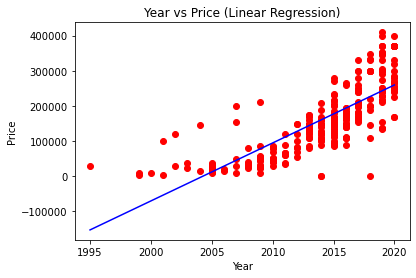

In [16]:
plt.scatter(X_year, y_year, color = 'red')
plt.plot(X_year, lin_reg_year.predict(X_year), color = 'blue')
plt.title('Year vs Price (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

## Visualising the Linear Regression results km

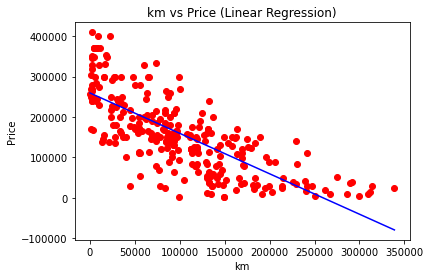

In [17]:
plt.scatter(X_km, y_km, color = 'red')
plt.plot(X_km, lin_reg_km.predict(X_km), color = 'blue')
plt.title('km vs Price (Linear Regression)')
plt.xlabel('km')
plt.ylabel('Price')
plt.show()

## Visualising the Polynomial Regression results year

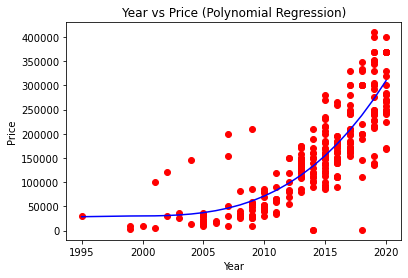

In [18]:
plt.scatter(X_year, y_year, color = 'red')
plt.plot(X_year, lin_reg_year_2.predict(poly_year_reg.fit_transform(X_year)), color = 'blue')
plt.title('Year vs Price (Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

## Visualising the Polynomial Regression results km

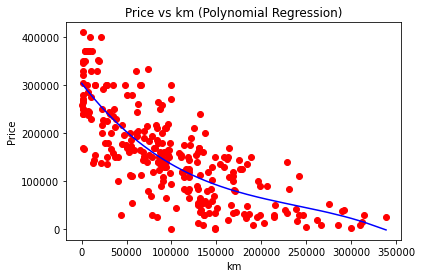

In [19]:
plt.scatter(X_km, y_km, color = 'red')
plt.plot(X_km, lin_reg_km_2.predict(poly_km_reg.fit_transform(X_km)), color = 'blue')
plt.title('Price vs km (Polynomial Regression)')
plt.xlabel('km')
plt.ylabel('Price')
plt.show()

## Predicting test result with Linear Regression

In [20]:
predict_year = lin_reg_year.predict(X_year_test)
predict_km = lin_reg_km.predict(X_km_test)

np.set_printoptions(precision=2)

display(lin_reg_year.score(X_year_test, y_year_test))
#display(np.concatenate((predict_year.reshape(len(predict_year), 1),y_year_test.reshape(len(y_year_test), 1) ), 1))

display(lin_reg_km.score(X_km_test, y_km_test))
#display(np.concatenate((predict_km.reshape(len(predict_km), 1),y_km_test.reshape(len(y_km_test), 1) ), 1))

0.6390894310551378

AttributeError: 'Series' object has no attribute 'reshape'

## Predicting a new result with Polynomial Regression

In [11]:
predict_year = lin_reg_year_2.predict(poly_year_reg.fit_transform(X_year_test))
predict_km = lin_reg_km_2.predict(poly_km_reg.fit_transform(X_km_test))

np.set_printoptions(precision=2)

display(lin_reg_year_2.score(poly_year_reg.fit_transform(X_year_test), y_year_test))
#display(np.concatenate((predict_year.reshape(len(predict_year), 1),y_year_test.reshape(len(y_year_test), 1) ), 1))

display(lin_reg_km_2.score(poly_km_reg.fit_transform(X_km_test), y_km_test))
#display(np.concatenate((predict_km.reshape(len(predict_km), 1),y_km_test.reshape(len(y_km_test), 1) ), 1))

0.7281887100459794

AttributeError: 'Series' object has no attribute 'reshape'